# Building a complete Short-time Fourier Transform System

Using examples

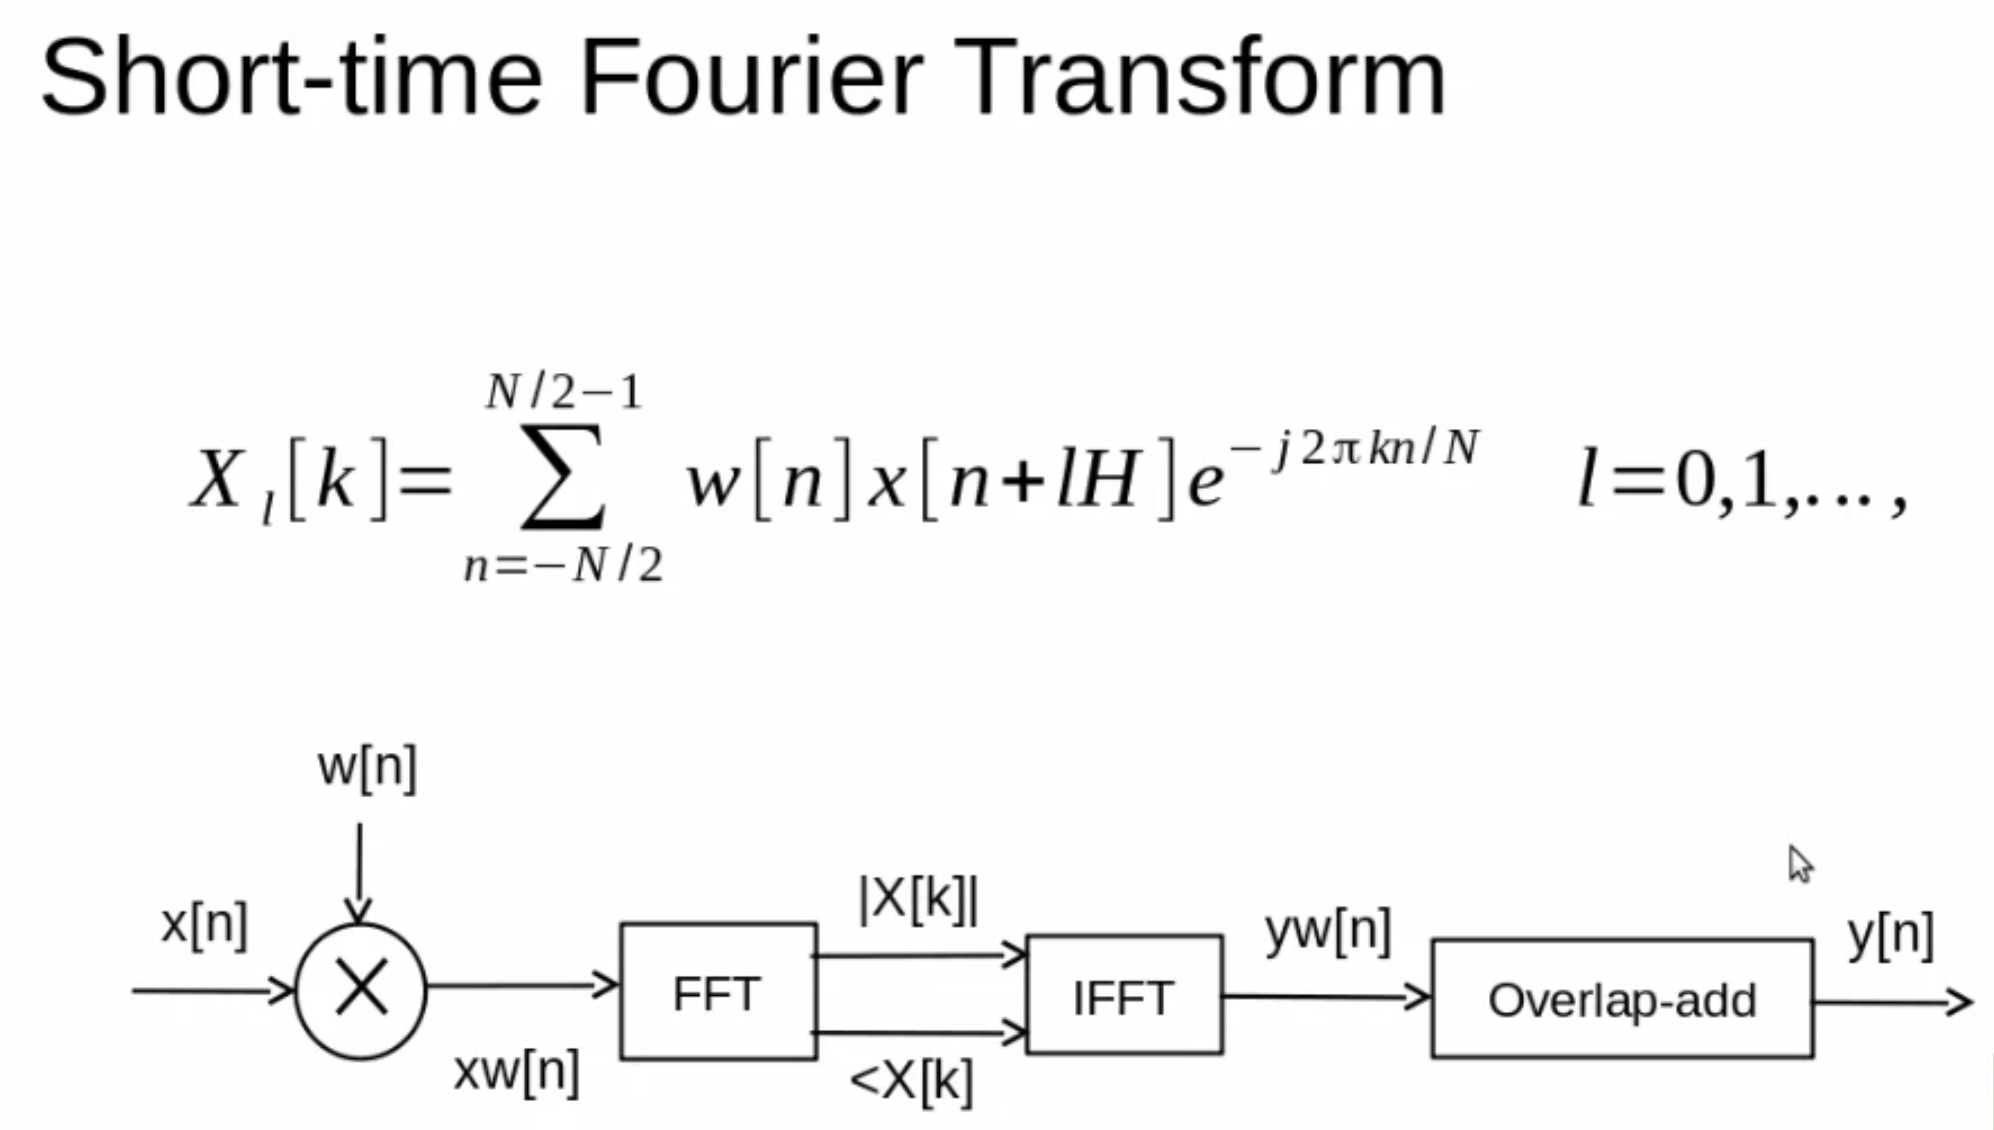

[Todo] add more info

In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../software/models/'))
print(sys.path)

['/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace', '/Users/atul/miniconda3/envs/PY39/lib/python39.zip', '/Users/atul/miniconda3/envs/PY39/lib/python3.9', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/lib-dynload', '', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages', '/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace/../software/models/']


In [3]:
import numpy as np
import scipy 
from scipy.signal import get_window
from scipy.fftpack import fft
import math 
import matplotlib.pyplot as plt


In [4]:
# our local imports
import dftModel as DFT # from SMS-Tools
import utilFunctions as UF
import stft as STFT

In [5]:
## Let's run on a sound sample
input = '../sounds/flute-A4.wav'
window = 'hamming'
M = 801 # window size
N = 1024 # FFT size; power of 2, greater than M
H = 400 # hop-size for STFT calc

In [6]:
fs, x = UF.wavread(input)

In [8]:
w = get_window(window, M)
# STFT analysis - using our signal x, frequency fs, window size w, N, and H
mX, pX = STFT.stftAnal(x, w, N, H)  

In [10]:
from IPython.display import Audio

In [11]:
Audio(input)  # plays our chosen Flute sound sample

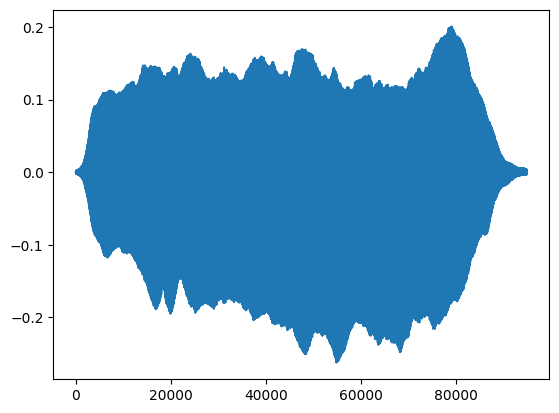

In [12]:
# plots
plt.plot(x)

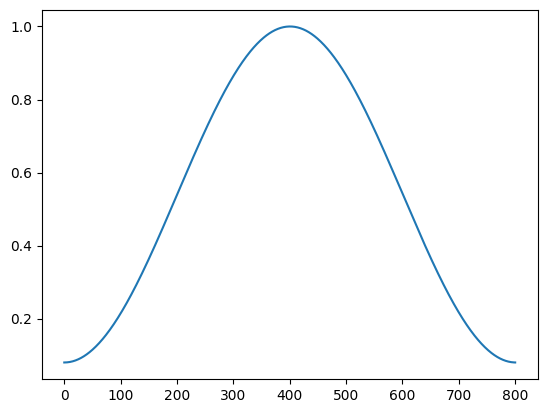

In [13]:
# plot window
plt.plot(w)

In [14]:
mX.shape

(238, 513)

In [15]:
# get the 50th frame
mX[50,]

array([ -78.8563491 ,  -69.52016101,  -66.57724931,  -67.49283755,
        -73.64922108,  -72.57116371,  -68.94669855,  -73.64810497,
        -59.11828231,  -34.24335036,  -26.96909824,  -28.81003793,
        -40.72273103,  -69.92548152,  -73.70873107,  -72.89965678,
        -70.345662  ,  -78.27748234,  -88.60143993,  -38.81486863,
        -27.97409451,  -26.77438864,  -34.82676796,  -61.80883972,
        -77.9465966 ,  -66.30562598,  -72.62668064,  -72.61832512,
        -65.04163724,  -59.59136478,  -44.23646452,  -39.53750374,
        -43.92780201,  -61.65871944,  -67.35482082,  -72.75783544,
        -79.25644778,  -70.04599418,  -75.58393528,  -59.84796345,
        -39.12654496,  -33.38991154,  -36.39002397,  -49.41032882,
        -67.57135428,  -85.93241264,  -90.2673789 ,  -73.58982031,
        -78.15428735,  -68.25215059,  -60.74302876,  -54.3331253 ,
        -54.66992708,  -64.20141289,  -76.22705678,  -77.05134466,
        -88.98068298,  -73.13057084,  -82.86473229,  -76.81431

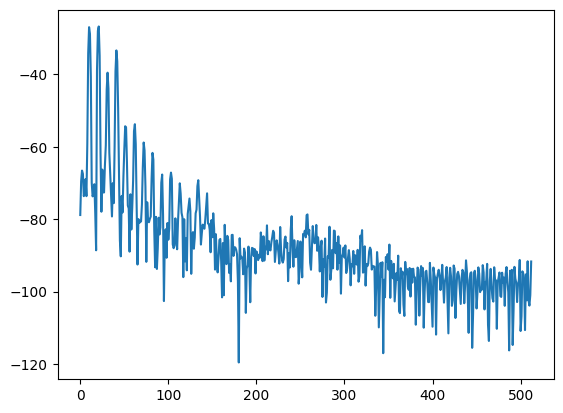

In [16]:
plt.plot(mX[50,:])

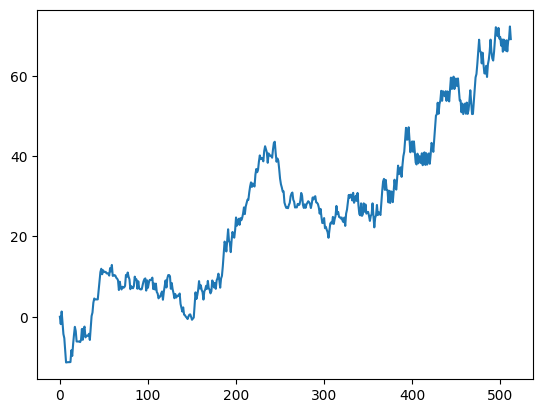

In [17]:
# plot phase of the same
plt.plot(pX[50,:])

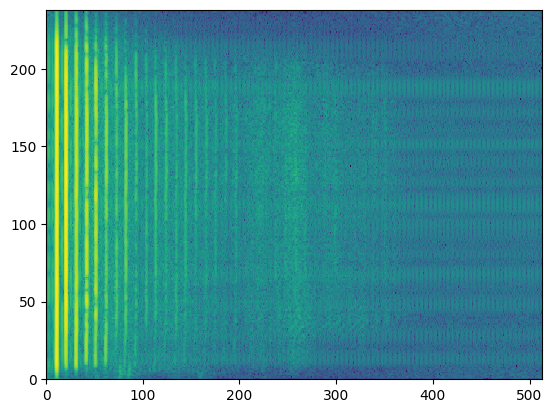

In [18]:
#plot the whole spectrum
plt.pcolormesh(mX)

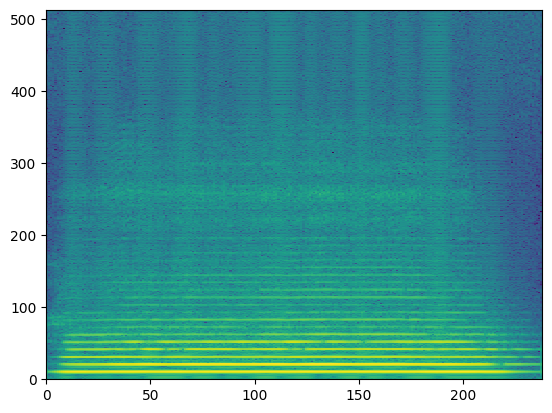

In [19]:
# plot it transposed - so Time is on X axis, and Freq on y
plt.pcolormesh(np.transpose(mX))

#### Using STFT_Function
from the models_interface directory


In [24]:
def stft_function(inputFile = '../sounds/piano.wav', window = 'hamming', M = 1024, N = 1024, H = 512):
	"""
	analysis/synthesis using the STFT
	inputFile: input sound file (monophonic with sampling rate of 44100)
	window: analysis window type (choice of rectangular, hanning, hamming, blackman, blackmanharris)
	M: analysis window size
	N: fft size (power of two, bigger or equal than M)
	H: hop size (at least 1/2 of analysis window size to have good overlap-add)
	"""

	# read input sound (monophonic with sampling rate of 44100)
	fs, x = UF.wavread(inputFile)

	# compute analysis window
	w = get_window(window, M)

	# compute the magnitude and phase spectrogram
	mX, pX = STFT.stftAnal(x, w, N, H)

	# perform the inverse stft
	y = STFT.stftSynth(mX, pX, M, H)

	# output sound file (monophonic with sampling rate of 44100)
	outputFile = '/tmp/' + os.path.basename(inputFile)[:-4] + '_stft.wav'

	# write the sound resulting from the inverse stft
	UF.wavwrite(y, fs, outputFile)

	# create figure to plot
	plt.figure(figsize=(9, 6))

	# frequency range to plot
	maxplotfreq = 5000.0

	# plot the input sound
	plt.subplot(4,1,1)
	plt.plot(np.arange(x.size)/float(fs), x)
	plt.axis([0, x.size/float(fs), min(x), max(x)])
	plt.ylabel('amplitude')
	plt.xlabel('time (sec)')
	plt.title('input sound: x')

	# plot magnitude spectrogram
	plt.subplot(4,1,2)
	numFrames = int(mX[:,0].size)
	frmTime = H*np.arange(numFrames)/float(fs)
	binFreq = fs*np.arange(N*maxplotfreq/fs)/N
	plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
	plt.xlabel('time (sec)')
	plt.ylabel('frequency (Hz)')
	plt.title('magnitude spectrogram')
	plt.autoscale(tight=True)

	# plot the phase spectrogram
	plt.subplot(4,1,3)
	numFrames = int(pX[:,0].size)
	frmTime = H*np.arange(numFrames)/float(fs)
	binFreq = fs*np.arange(N*maxplotfreq//fs)//N
	plt.pcolormesh(frmTime, binFreq, np.transpose(np.diff(pX[:,:int(N*maxplotfreq/fs+1)],axis=1)))
	plt.xlabel('time (sec)')
	plt.ylabel('frequency (Hz)')
	plt.title('phase spectrogram (derivative)')
	plt.autoscale(tight=True)

	# plot the output sound
	plt.subplot(4,1,4)
	plt.plot(np.arange(y.size)/float(fs), y)
	plt.axis([0, y.size/float(fs), min(y), max(y)])
	plt.ylabel('amplitude')
	plt.xlabel('time (sec)')
	plt.title('output sound: y')

	plt.tight_layout()
	plt.ion()
	plt.show()


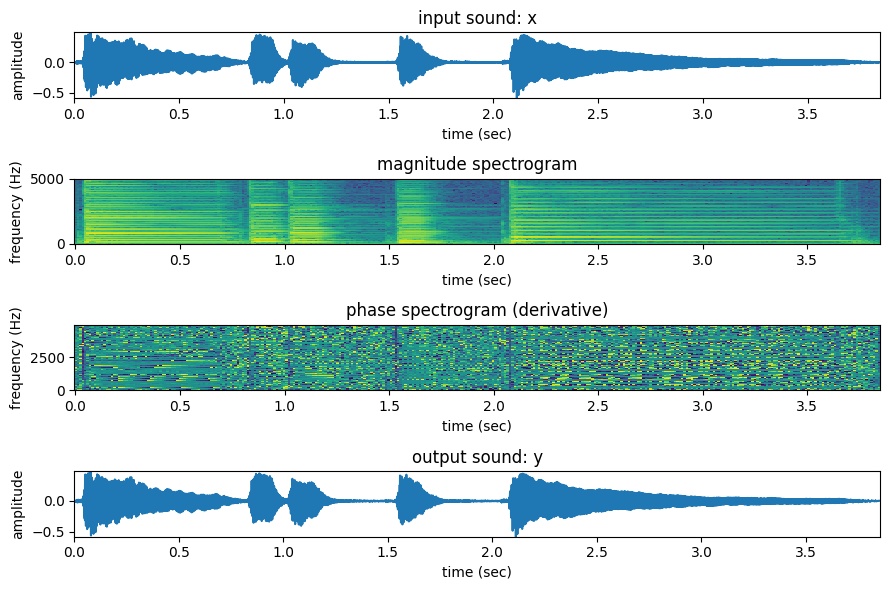

In [25]:
stft_function()